In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

credit = pd.read_csv('default of credit card Taiwan.csv')
print(credit.columns)

Index(['AmountOfGivenCredit', 'Gender', 'Education', 'MaritalStatus', 'Age',
       'RepaymentStatus', 'AmountOfBillStatement', 'AmountOfPreviousPayment',
       'Outcome'],
      dtype='object')


In [2]:
credit.head()

,AmountOfGivenCredit,Gender,Education,MaritalStatus,Age,RepaymentStatus,AmountOfBillStatement,AmountOfPreviousPayment,Outcome
0,20000,Female,University,Married,24,2,3913,0,1
1,120000,Female,University,Single,26,-1,2682,0,1
2,90000,Female,University,Single,34,0,29239,1518,0
3,50000,Female,University,Married,37,0,46990,2000,0
4,50000,Male,University,Married,57,-1,8617,2000,0


In [3]:
print("dimension of credit data: {}".format(credit.shape) )

dimension of credit data: (30000, 9)


In [4]:
print(credit.groupby('Outcome').size())

Outcome
0    23364
1     6636
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

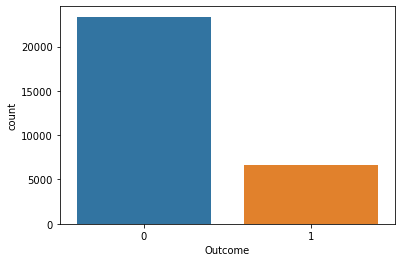

In [5]:
import seaborn as sns
sns.countplot(credit['Outcome'],label="Count")

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   AmountOfGivenCredit      30000 non-null  int64 
 1   Gender                   30000 non-null  object
 2   Education                30000 non-null  object
 3   MaritalStatus            30000 non-null  object
 4   Age                      30000 non-null  int64 
 5   RepaymentStatus          30000 non-null  int64 
 6   AmountOfBillStatement    30000 non-null  int64 
 7   AmountOfPreviousPayment  30000 non-null  int64 
 8   Outcome                  30000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.1+ MB


# Create dummy variables

In [7]:
credit1 = pd.get_dummies(credit,columns=['Gender'])
credit2 = pd.get_dummies(credit1,columns=['Education'])
credit_final = pd.get_dummies(credit2,columns=['MaritalStatus'])
credit_final.columns

Index(['AmountOfGivenCredit', 'Age', 'RepaymentStatus',
       'AmountOfBillStatement', 'AmountOfPreviousPayment', 'Outcome',
       'Gender_Female', 'Gender_Male', 'Education_Graduate School',
       'Education_High School', 'Education_Others', 'Education_University',
       'MaritalStatus_Married', 'MaritalStatus_Others',
       'MaritalStatus_Single'],
      dtype='object')

# Over-sampling using SMOTE

In [8]:
X = credit_final.loc[:, credit_final.columns != 'Outcome']
y = credit_final.loc[:, credit_final.columns == 'Outcome']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
columns = X.columns

os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of default",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  46728
Number of no default in oversampled data 23364
Number of default 23364
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [9]:
X=os_data_X
y=os_data_y

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# k-Nearest Neighbors

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

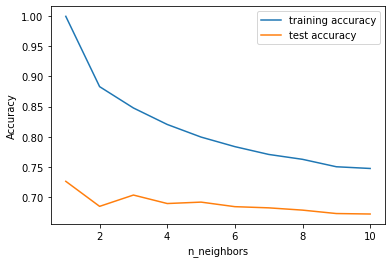

In [11]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.70


# Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.604
Test set score: 0.593


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
logreg0001 = LogisticRegression(C=0.001, random_state=42).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg0001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg0001.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training set accuracy: 0.604
Test set accuracy: 0.593


In [15]:
logreg100 = LogisticRegression(C=100, random_state=42).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training set accuracy: 0.604
Test set accuracy: 0.593


In [16]:
logreg0001 = LogisticRegression(C=0.001, random_state=42).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg0001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg0001.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training set accuracy: 0.604
Test set accuracy: 0.593


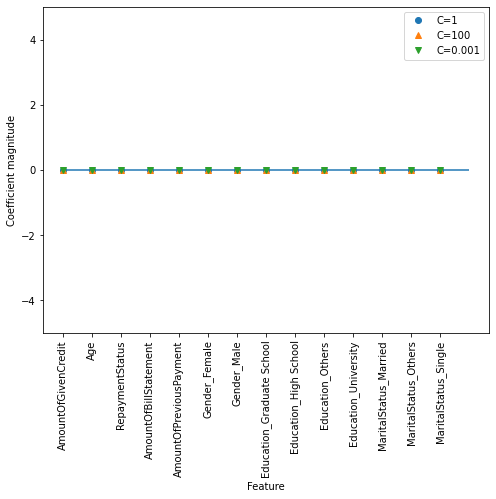

In [17]:
credit_features = [x for i,x in enumerate(X.columns) if i!= len(X.columns) ]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg0001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(X.shape[1]), credit_features, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.801


In [19]:
tree2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.763
Accuracy on test set: 0.760


# Feature Importance in Decision Trees

In [20]:
print("Feature importances:\n{}".format(tree1.feature_importances_))

Feature importances:
[0.08982977 0.09955317 0.14732694 0.17083414 0.10904818 0.0183513
 0.09728582 0.0140973  0.03192114 0.01467583 0.01419256 0.13783332
 0.01750299 0.03754754]


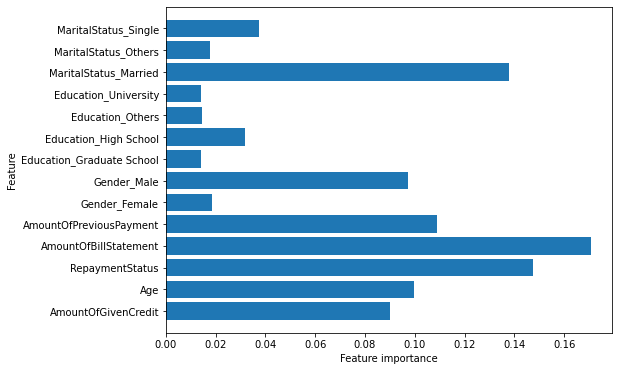

In [21]:
def plot_feature_importances_credit(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), credit_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_credit(tree1)
plt.savefig('feature_importance')

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy on training set: 0.999
Accuracy on test set: 0.857


In [23]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy on training set: 0.800
Accuracy on test set: 0.795


# Feature importance in Random Forest

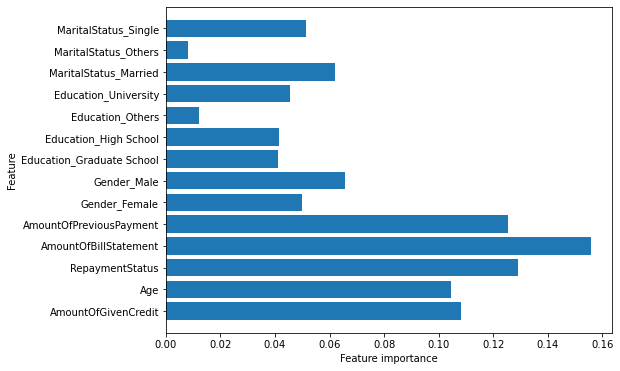

In [24]:
plot_feature_importances_credit(rf)

# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.855
Accuracy on test set: 0.846


In [26]:
gb1 = GradientBoostingClassifier(max_depth=1, random_state=42)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.799
Accuracy on test set: 0.797


In [27]:
gb2 = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
gb2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.811
Accuracy on test set: 0.807


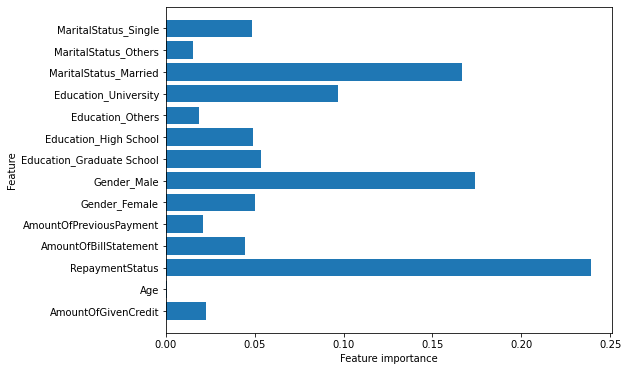

In [28]:
plot_feature_importances_credit(gb)

# Support Vector Machine

In [29]:
from sklearn.svm import SVC

svc1 = SVC(random_state=42)
svc1.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc1.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.60
Accuracy on test set: 0.59


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc2 = SVC(random_state=42)
svc2.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc2.score(X_test_scaled, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.84
Accuracy on test set: 0.84


In [31]:
svc3 = SVC(C=1000, random_state=42)
svc3.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc3.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc3.score(X_test_scaled, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.850
Accuracy on test set: 0.828


# Deep Learning

In [32]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(random_state=42)
mlp1.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp1.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.51
Accuracy on test set: 0.51


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp2 = MLPClassifier(random_state=42)
mlp2.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(X_test_scaled, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.856
Accuracy on test set: 0.846


In [34]:
mlp3 = MLPClassifier(max_iter=1000, random_state=42)
mlp3.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp3.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp3.score(X_test_scaled, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.856
Accuracy on test set: 0.846


In [35]:
mlp4 = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp4.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp4.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp4.score(X_test_scaled, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.851
Accuracy on test set: 0.844


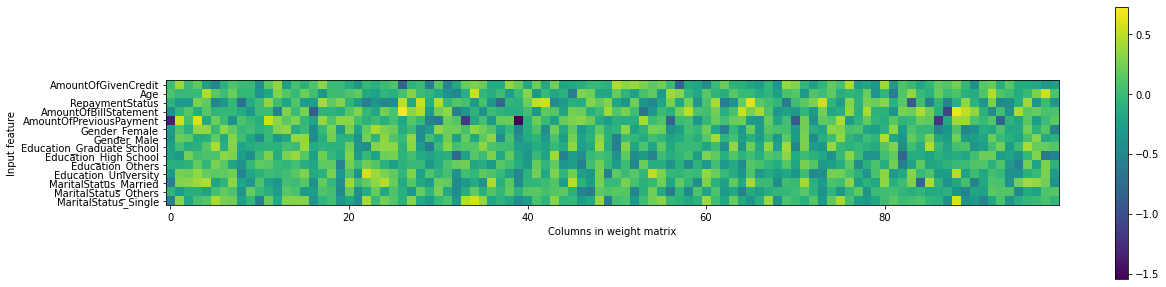

In [36]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp2.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(X.columns)), credit_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [37]:
algorithms = ['k-Nearest Neighbors','Logistic Regression', 'Decision Trees', 'Random Forest',
          'Gradient Boosting', 'Support Vector Machine', 'Deep Learning']
tests_accuracy = [knn.score(X_test, y_test), logreg.score(X_test, y_test), tree1.score(X_test, y_test),
                  rf.score(X_test, y_test), gb.score(X_test, y_test), svc2.score(X_test_scaled, y_test),
                  mlp2.score(X_test_scaled, y_test)]
compare_algorithms = pd.DataFrame({ "Algorithms": algorithms, "Tests Accuracy": tests_accuracy })
compare_algorithms.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Tests Accuracy
3,Random Forest,0.857337
4,Gradient Boosting,0.846313
6,Deep Learning,0.845989
2,Decision Trees,0.801245
0,k-Nearest Neighbors,0.703781
1,Logistic Regression,0.593412
5,Support Vector Machine,0.515985


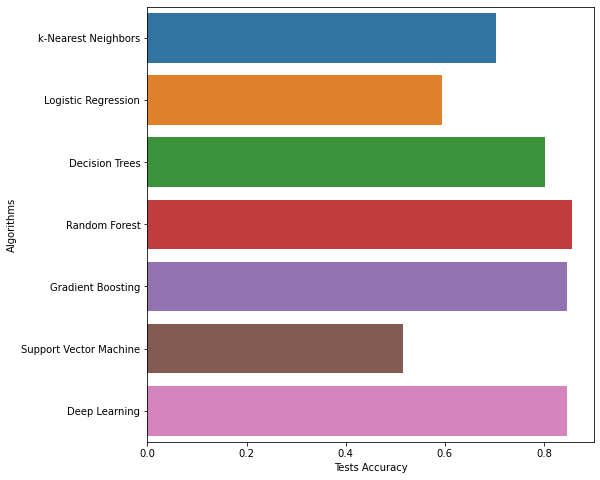

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Accuracy", y = "Algorithms", data = compare_algorithms)
plt.show()